Practice exercises and activities based on the book "Interactive Data Visualization with Python: Present your data as an effective and compelling story," 2nd Edition

Book link: https://www.amazon.com/Interactive-Data-Visualization-Python-compelling/dp/1800200943

Date: September 2021

Author: Steven Ponce

# Chapter 2: Static  Visualization - Global Pattern and Summary Statistics

In [1]:
# Load libraries

import sys
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload   
%autoreload 2
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.8.3


In [2]:
# Name: Auto MPG Dataset
# Dataset link: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

# Loading the data

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', \
                'model_year', 'origin', 'car_name']

mpg_df = pd.read_csv('mpg.data', delim_whitespace=True, names=column_names)

print('Rows, Columns: ', mpg_df.shape)
mpg_df.head()

# Alternative
# mpg_df = sns.load_dataset('mpg')

Rows, Columns:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

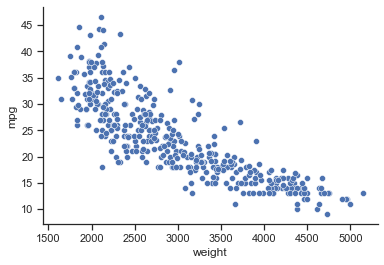

In [4]:
# Scatter plots
sns.set(style='ticks')
ax = sns.scatterplot(x='weight', y='mpg', data=mpg_df);
sns.despine(right=True)

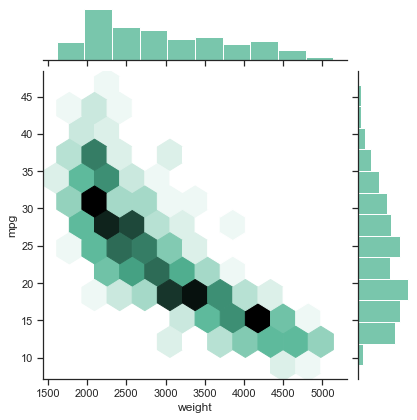

In [5]:
# Hexagonal binning plots
sns.jointplot(mpg_df.weight, mpg_df.mpg, 
              kind='hex',
             color='#4CB391');

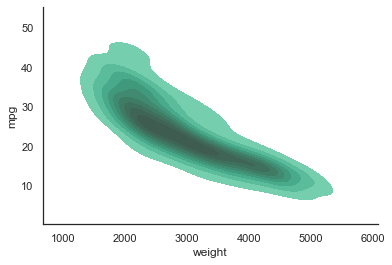

In [6]:
# Contour plot
sns.set(style='white')
sns.kdeplot(mpg_df.weight, mpg_df.mpg, 
            shade=True,
           color='#4CB391');
sns.despine(right=True)

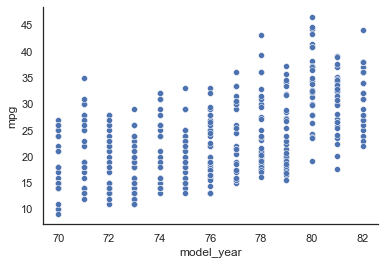

In [7]:
# Line plot
sns.set(style='white')
ax = sns.scatterplot(x='model_year', y='mpg', data=mpg_df);
sns.despine(right=True)

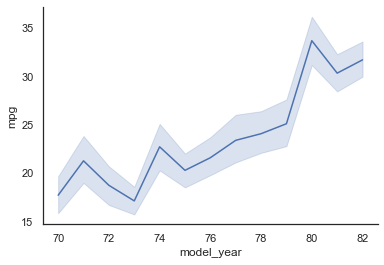

In [8]:
ax = sns.lineplot(x='model_year', y='mpg', data=mpg_df);
sns.despine(right=True)

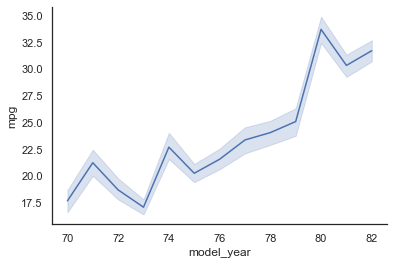

In [9]:
# ci = 68%
ax = sns.lineplot(x='model_year', y='mpg', data=mpg_df, ci=68);
sns.despine(right=True)

In [10]:
mpg_df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [11]:
# Loading the data
flights_df = sns.load_dataset('flights')
print('Rows, Columns: ', flights_df.shape)
flights_df.head()

Rows, Columns:  (144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


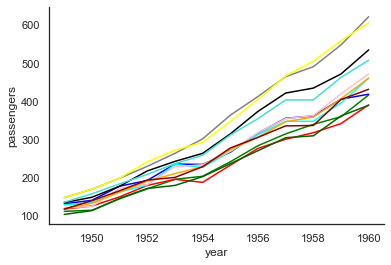

In [12]:
# multiple line plots

ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Jan'], color='green')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Feb'], color='red')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Mar'], color='blue')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Apr'], color='cyan')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='May'], color='pink')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Jun'], color='black')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Jul'], color='grey')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Aug'], color='yellow')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Sep'], color='turquoise')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Oct'], color='orange')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Nov'], color='darkgreen')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='Dec'], color='darkred')
sns.despine(right=True)

In [13]:
# pivot DF
df_pivoted = flights_df.pivot('month', 'year', 'passengers')
df_pivoted.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


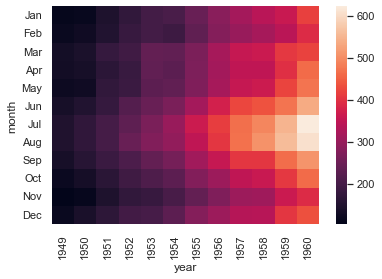

In [14]:
# heatmap
ax = sns.heatmap(df_pivoted)

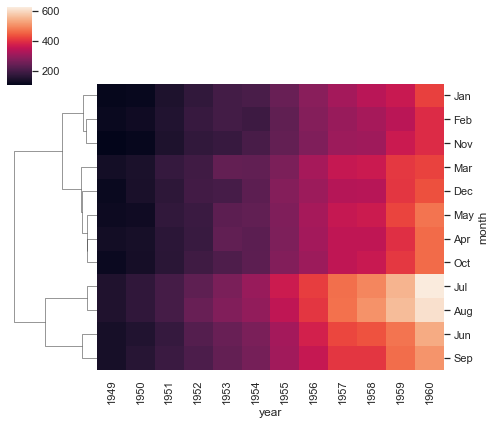

In [15]:
# using clustermap option
ax = sns.clustermap(df_pivoted,
                    figsize=(7, 6),
                   col_cluster=False,
                   row_cluster=True,
                   );

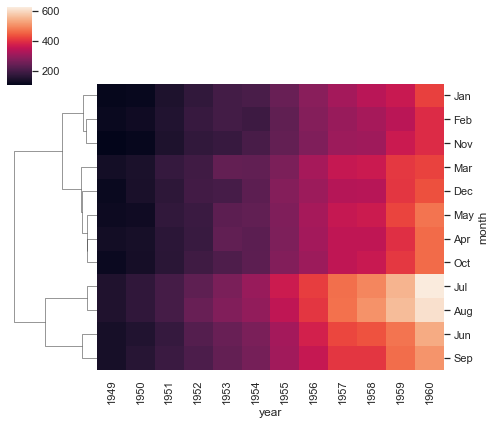

In [16]:
# set metric to euclidean
ax = sns.clustermap(df_pivoted,
                    figsize=(7, 6),
                   col_cluster=False,
                    metric='euclidean',
                   );

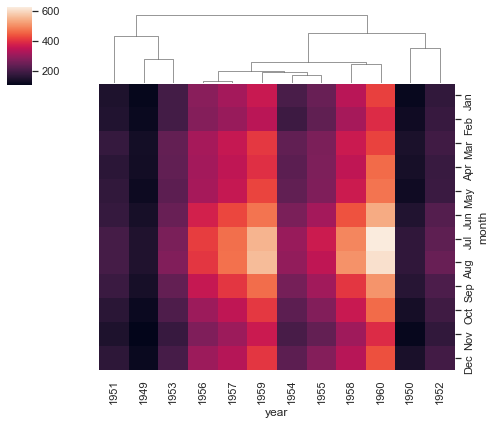

In [17]:
# set metric to correlation
ax = sns.clustermap(df_pivoted, 
                    row_cluster=False,
                    metric='correlation',
                    figsize=(7, 6));

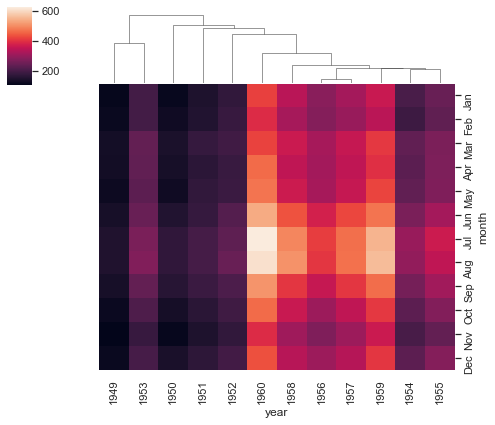

In [18]:
# correlation single linkage method
ax = sns.clustermap(df_pivoted, 
                    row_cluster=False,
                    metric='correlation',
                    method='single',
                    figsize=(7, 6));

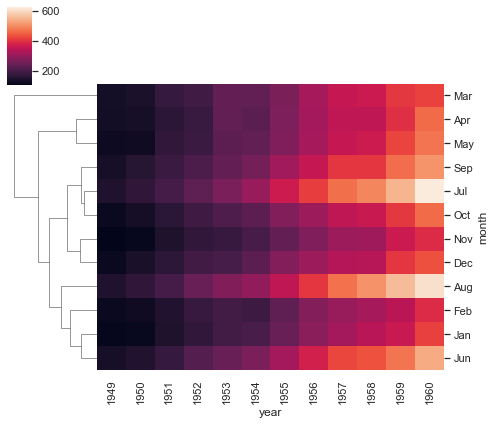

In [19]:
# correlation single average method
ax = sns.clustermap(df_pivoted, 
                    col_cluster=False,
                    metric='correlation',
                    method='average',
                    figsize=(7, 6));

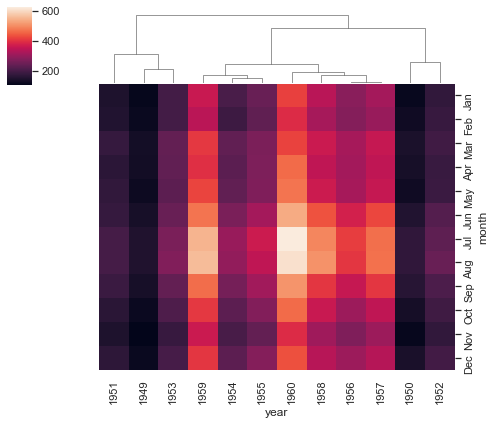

In [20]:
# correlation comple linkage method
ax = sns.clustermap(df_pivoted, 
                    row_cluster=False,
                    metric='correlation',
                    method='complete',
                    figsize=(7, 6));

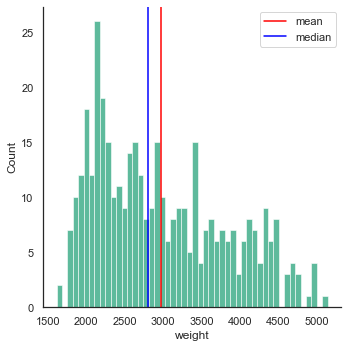

In [21]:
# Plots that present summary statistic of your data

# histogram revisited
ax = sns.displot(mpg_df.weight, bins=50, kde=False, alpha=0.9, color='#4CB391')
plt.axvline(np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(np.median(mpg_df.weight), color='blue', label='median')
plt.legend(loc='best');

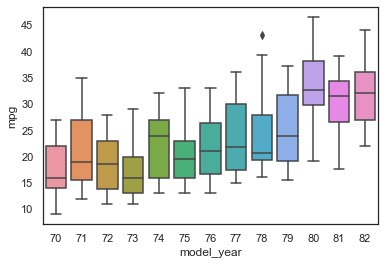

In [22]:
# box plots
sns.boxplot(x='model_year', y='mpg', data=mpg_df);

In [23]:
# modify the DF to add a new feature 'model_decade'

# The numpy.floor() is a mathematical function that returns the floor of the elements of array. 
# The floor of the scalar x is the largest integer i, such that i <= x.

mpg_df['model_decade'] = (np.floor(mpg_df['model_year']/10) * 10).astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,model_decade
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,80
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,80
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,80
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,80
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10,80


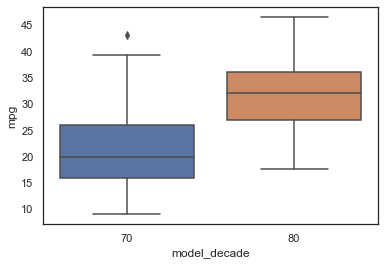

In [24]:
# box plots updated
sns.boxplot(x='model_decade', y='mpg', data=mpg_df);

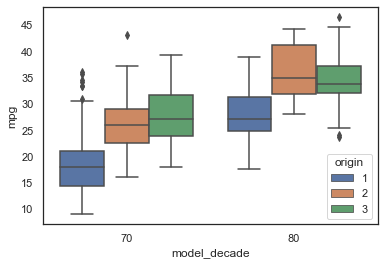

In [25]:
# hue
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin');

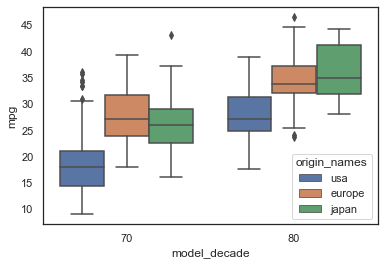

In [26]:
# create new feature with origin names
mpg_df['origin_names'] = mpg_df['origin'].map({1: "usa", 2: 'japan', 3: 'europe'})

#box plot
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin_names');

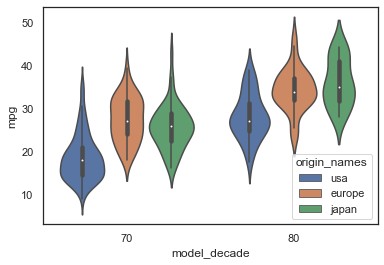

In [27]:
# violin plots
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin_names');

## Activity 2: 120 years of Olympic History

### Step 1 - download the dataset

In [28]:
# Loading the data
data = pd.read_csv('athlete_events.csv')

print('Rows, Columns: ', data.shape)
data.drop(columns=['ID'], axis=0, inplace=True)
data.tail()

Rows, Columns:  (271116, 15)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


### Step 2 - filter the DF to only include medal winners from 2016

In [29]:
data = data[(data.Year == 2016)]
data = data[data['Medal'].notna()] 
data.reset_index(inplace = True)

In [30]:
'''
@author:  Steven Ponce   
Date:     Sep 2021 
'''

def quick_analysis(df):
       
    print('\n 1. Dataset Information:')
    print('-'*40)
    print(df.info()) 
    
    print('\n 2. Columns:', df.shape[1], 'Rows:', df.shape[0])   
    print('-'*40)

    print('\n 3. Null Values:')
    print('-'*40)
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(table)    
    
    return quick_analysis
    raise NotImplementedError()


In [31]:
quick_analysis(data);


 1. Dataset Information:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2023 non-null   int64  
 1   Name    2023 non-null   object 
 2   Sex     2023 non-null   object 
 3   Age     2023 non-null   float64
 4   Height  2020 non-null   float64
 5   Weight  2015 non-null   float64
 6   Team    2023 non-null   object 
 7   NOC     2023 non-null   object 
 8   Games   2023 non-null   object 
 9   Year    2023 non-null   int64  
 10  Season  2023 non-null   object 
 11  City    2023 non-null   object 
 12  Sport   2023 non-null   object 
 13  Event   2023 non-null   object 
 14  Medal   2023 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 237.2+ KB
None

 2. Columns: 15 Rows: 2023
----------------------------------------

 3. Null Values:
----------------------------------------

### Evaluate an appropriate visualization(s) to depict Height and Weight feature

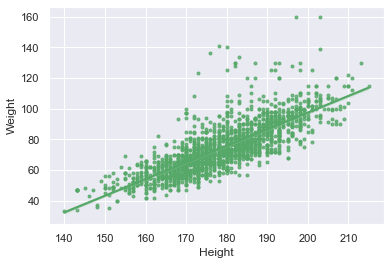

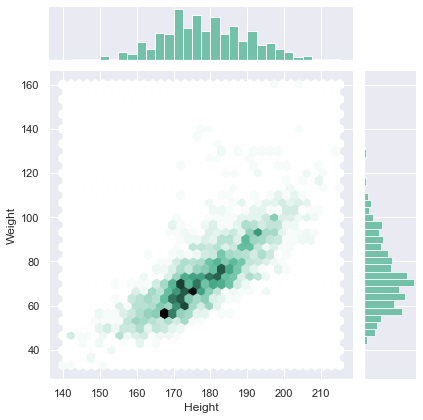

In [32]:

import seaborn as sns; sns.set_theme(color_codes=True)

plt.subplot(1, 1, 1) 

ax1 = sns.regplot(x='Height', y='Weight', data=data, 
                 color='g',
                 marker='.')

ax2 = sns.jointplot(data.Height, data.Weight,
              kind='hex',
             color='#4CB391');


### Evaluate an appropriate visualization(s) to depict medal wise summary statistics of the weight and height features

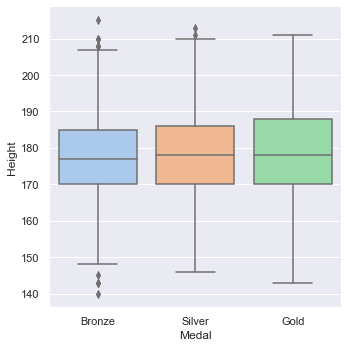

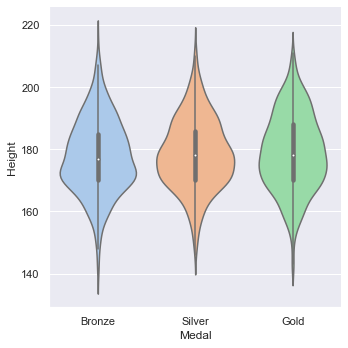

In [33]:

import seaborn as sns; sns.set_theme(color_codes=True)

ax1 = sns.factorplot(x='Medal', y='Height', data=data, kind='box', palette="pastel")

ax2 = sns.factorplot(x='Medal', y='Height', data=data, kind='violin', palette="pastel")